In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd ~

/Users/ae-j


In [3]:
cd Documents/GA/PL/project_group/lancelot_group_project

/Users/ae-j/Documents/GA/PL/project_group/lancelot_group_project


In [4]:
df = pd.read_csv('./data/df_final.csv')

## Corr Map

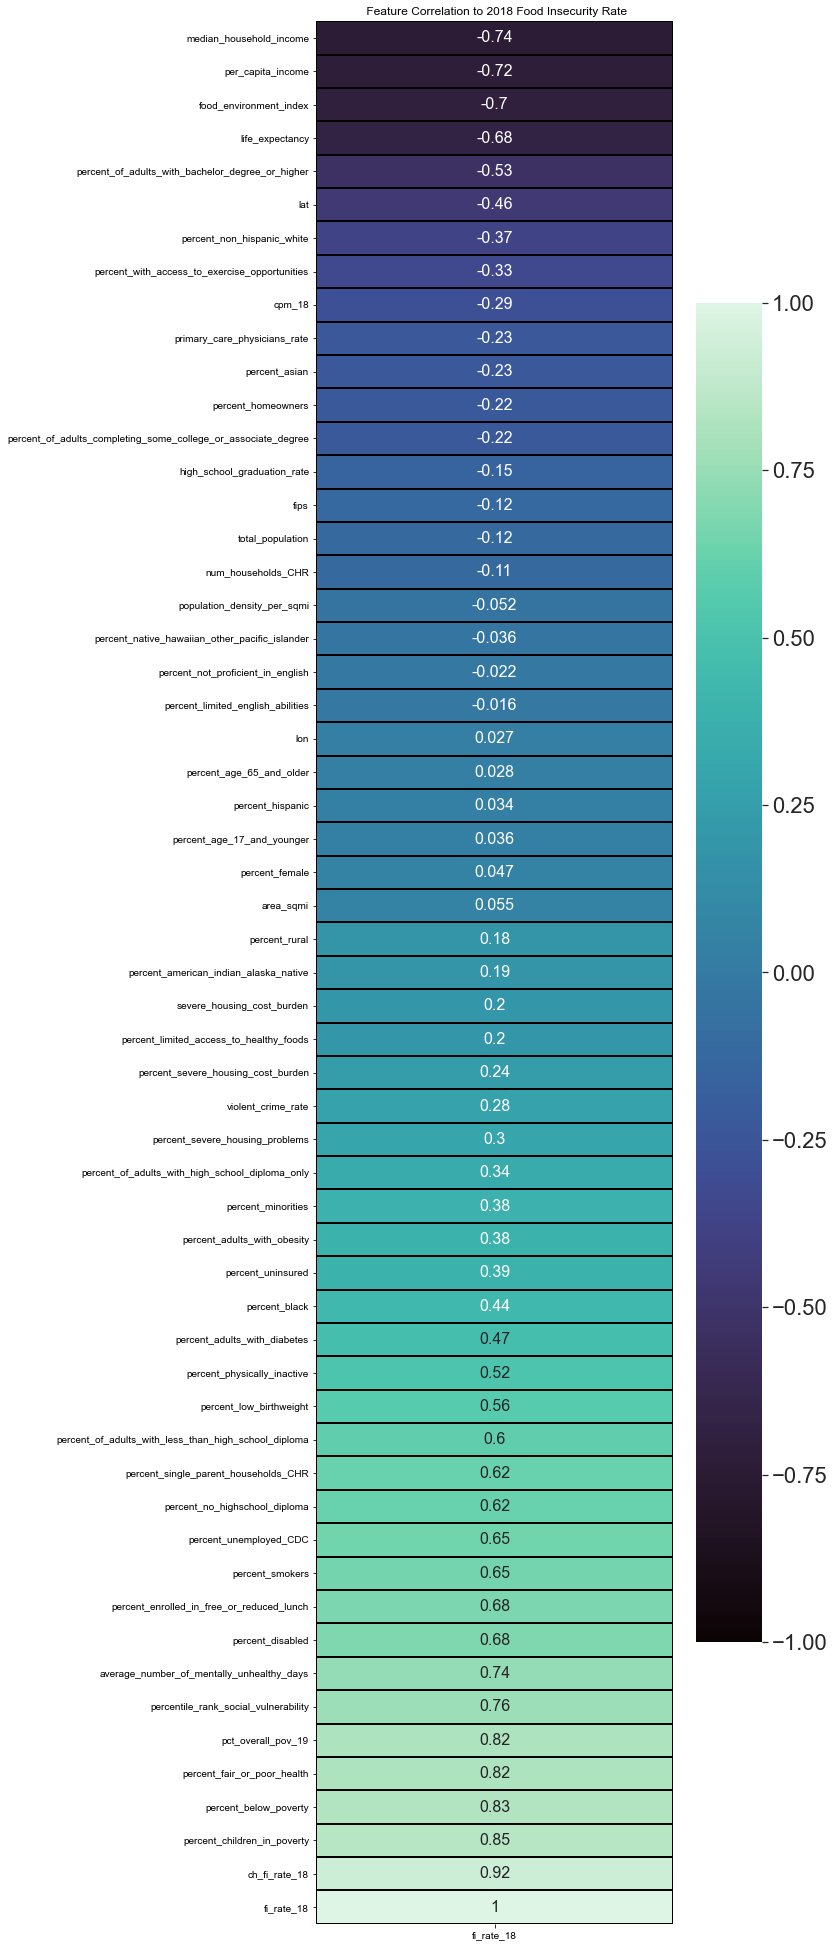

In [5]:
plt.figure(figsize=(8,35))
ax = plt.axes()
ax.set_title(' Feature Correlation to 2018 Food Insecurity Rate')
corr = df.corr()[['fi_rate_18']]
sns.set(font_scale=2)
sns.heatmap(corr.sort_values(by = 'fi_rate_18', ascending = True), annot=True, cmap='mako', vmin = -1, vmax = 1, linecolor= 'black', linewidth = 1,annot_kws={"fontsize":16});

In [6]:
df.filter(like='percent', axis=1).shape

(3140, 37)

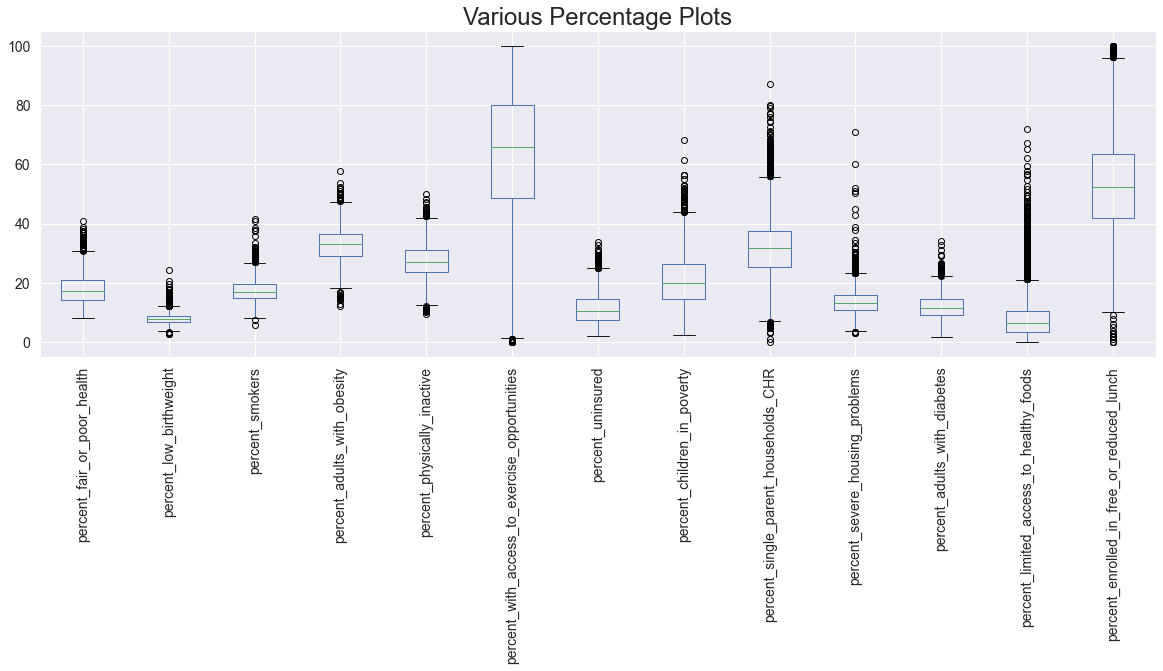

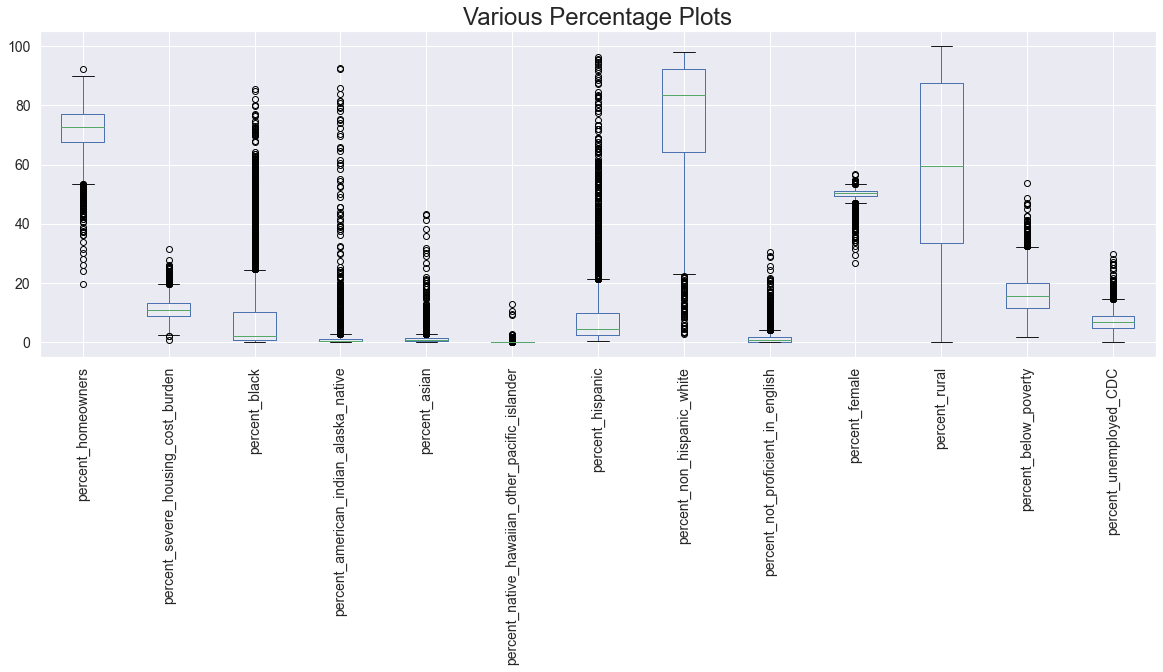

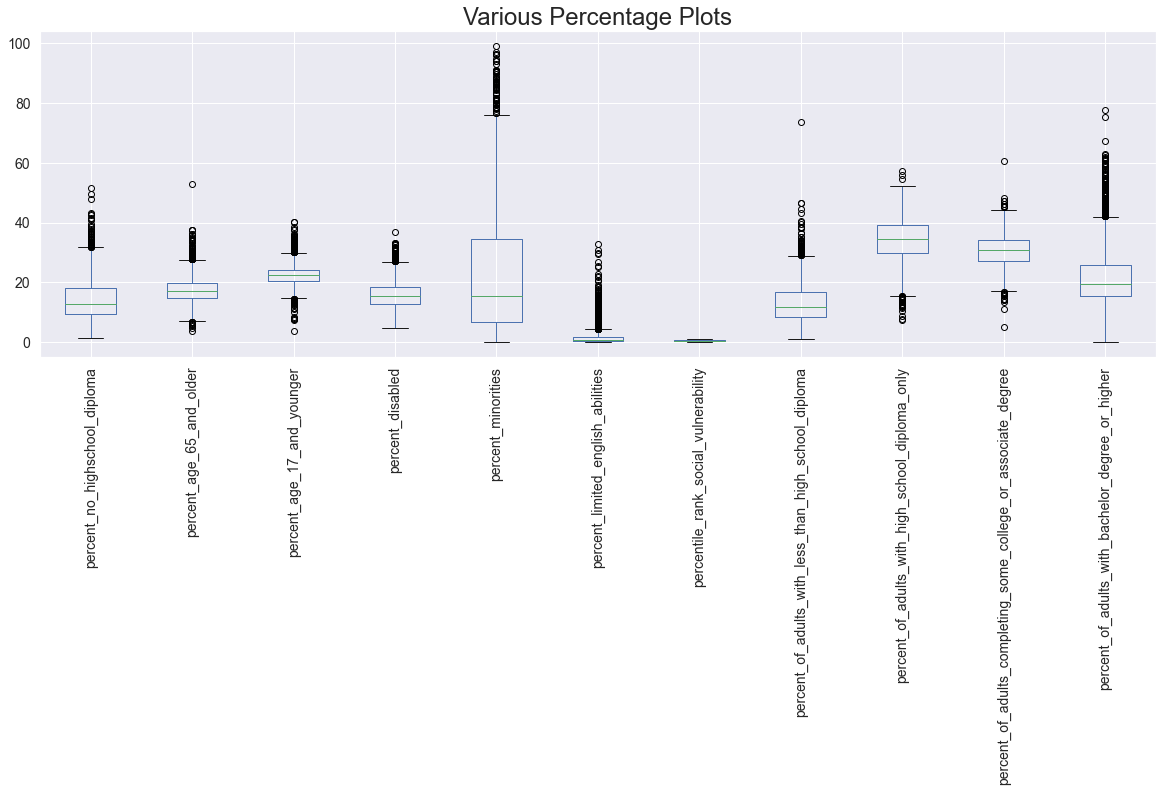

In [7]:
df[df.filter(like='percent', axis=1).columns[0:13]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');
df[df.filter(like='percent', axis=1).columns[13:26]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');
df[df.filter(like='percent', axis=1).columns[26:39]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Percentage Plots');

In [8]:
df.filter(like='rate', axis=1).shape

(3140, 5)

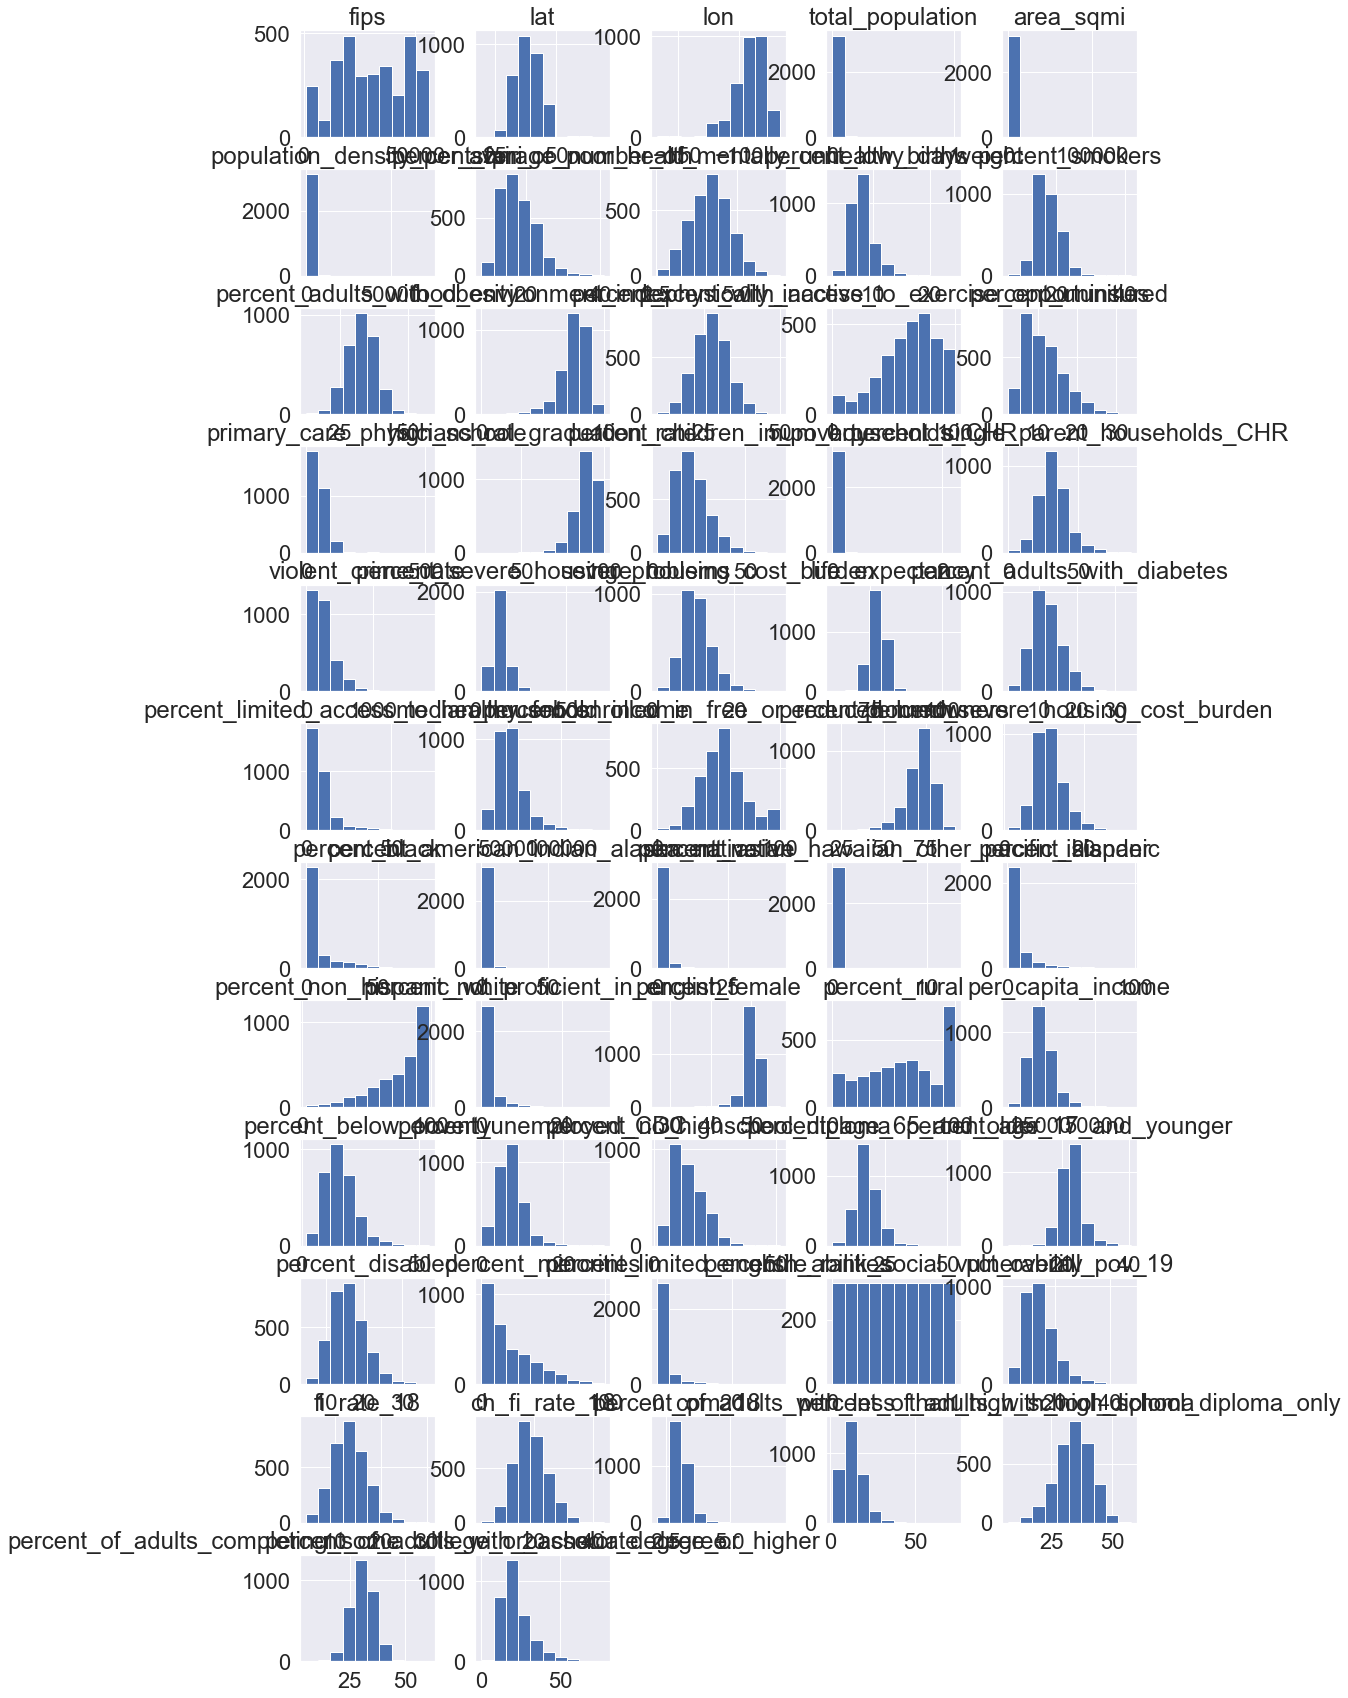

In [9]:
df.hist(figsize=(15, 30), layout=(12, 5));

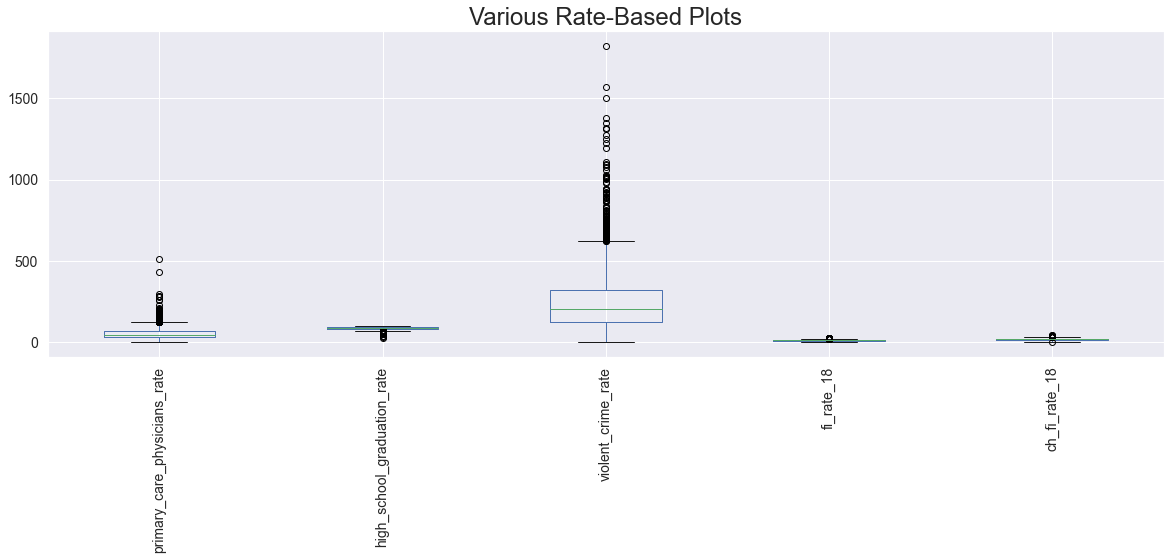

In [10]:
df[df.filter(like='rate', axis=1).columns[0:6]
       ].plot(kind= 'box', figsize=(20,6), rot = 90,fontsize = 14, title= 'Various Rate-Based Plots');

## Per state

As we can see, the rates of food insecurity vary significantly by state, with a 10+ percent point difference between the highest (Mississippi - 19.32%) and lowest (North Dakota - 6.47%). States with the highest rates are predominantly clustered in the South and Southwest of the country. 

In [11]:
df_fi_state = df.groupby('state_name')[['fi_rate_18']].mean().copy()

In [12]:
df_fi_state = df_fi_state.reset_index().sort_values(by = 'fi_rate_18', ascending = False)

In [13]:
df_fi_state

,state_name,fi_rate_18
24,Mississippi,19.312195
3,Arkansas,18.238667
0,Alabama,17.719403
18,Louisiana,16.535938
17,Kentucky,16.362500
2,Arizona,15.753333
31,New Mexico,15.487879
43,Texas,15.304331
33,North Carolina,15.147000
36,Oklahoma,15.001299


In [14]:
x_val = df_fi_state['state_name']
y_val = df_fi_state['fi_rate_18']

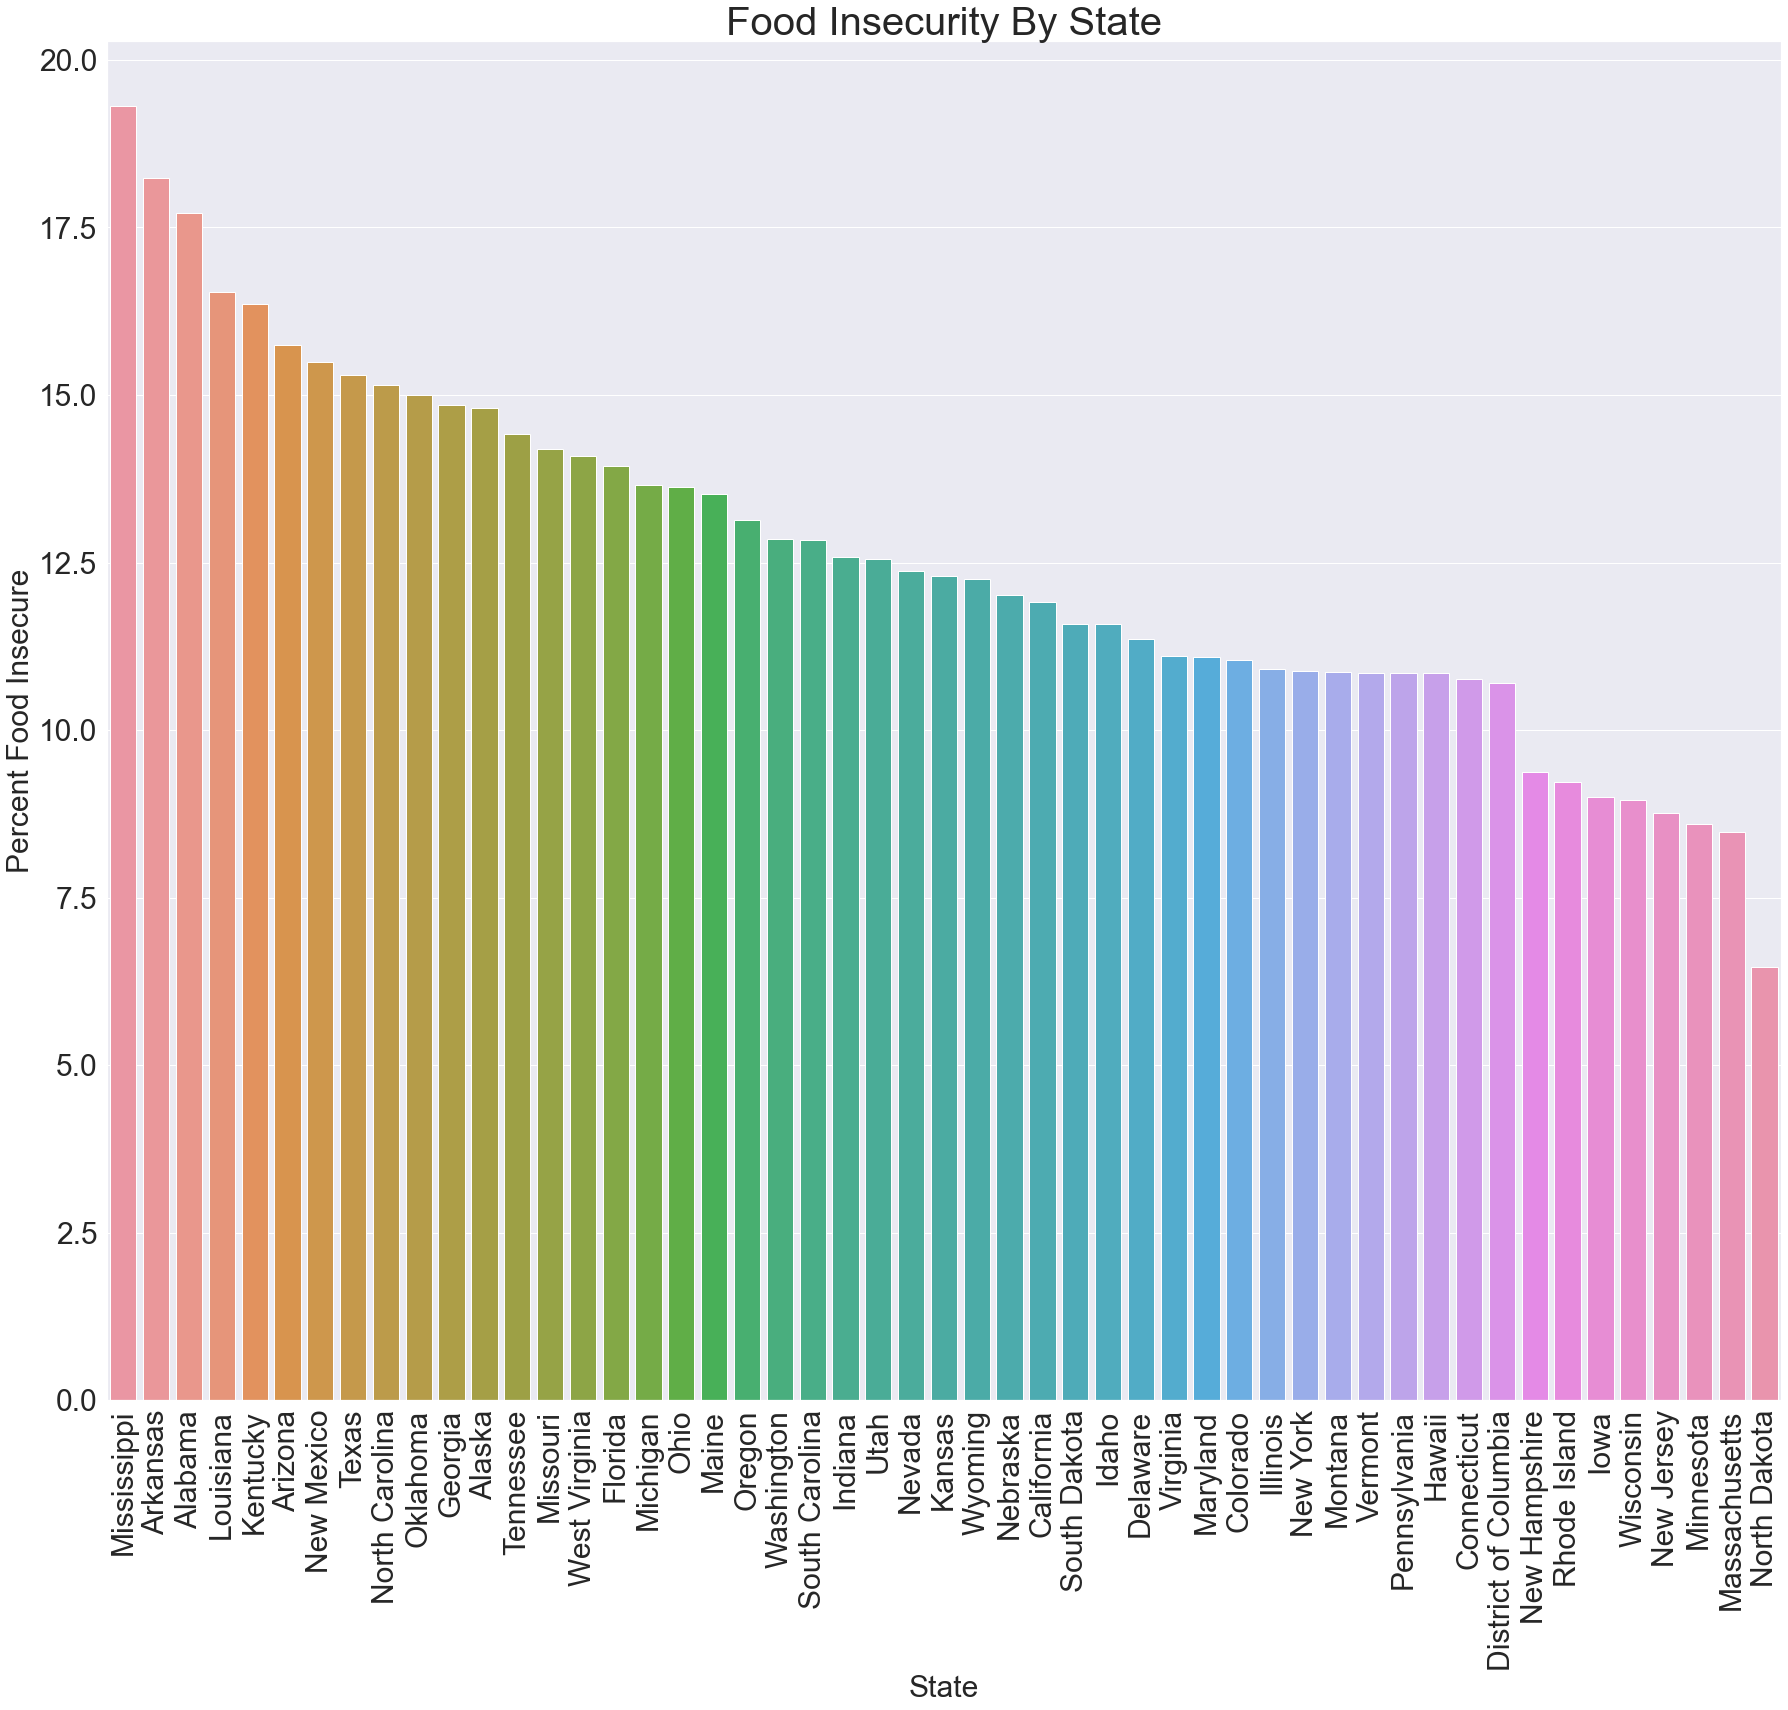

In [15]:
plt.figure(figsize=(30,25))
sns.barplot(x = x_val, y = y_val)

plt.tick_params(labelsize = 20)
plt.xticks(rotation = 'vertical', fontsize = 30)
plt.yticks(fontsize = 30)
plt.title('Food Insecurity By State',fontdict={'fontsize':40})
plt.xlabel('State', fontsize=30)
plt.ylabel('Percent Food Insecure', fontsize=30)
plt.show()

# Abridged correlation map 

<AxesSubplot:>

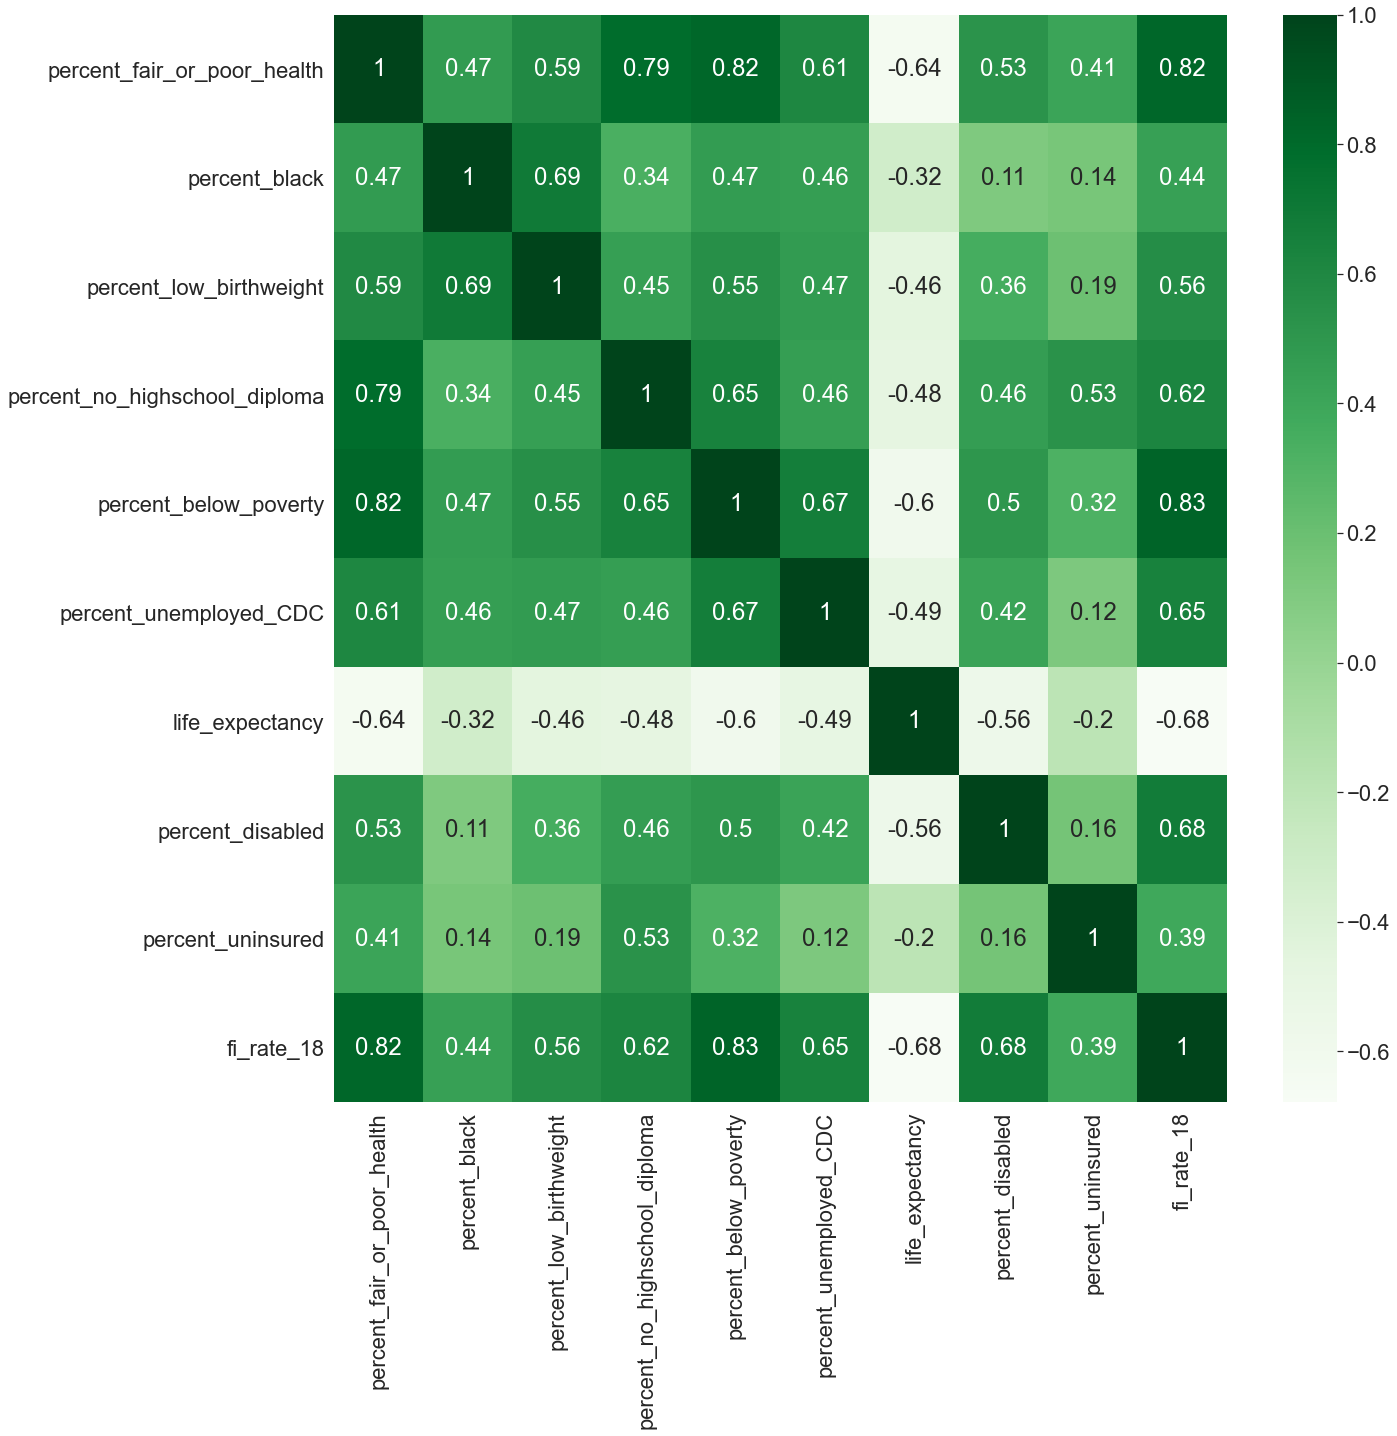

In [78]:
abridged = ['percent_fair_or_poor_health', 'percent_black', 
                  'percent_low_birthweight','percent_no_highschool_diploma',
                  'percent_below_poverty', 'percent_unemployed_CDC', 
                  'life_expectancy', 'percent_disabled',
                'percent_uninsured', 'fi_rate_18']

df_abr = df[abridged].copy()

plt.figure(figsize= (20,20))
sns.heatmap(df_abr.corr(), annot=True, cmap = "Greens")

The fact that percent_below_poverty is well correlated with fi_rates_18 (.83) and fair_or_poor_health (.82) is not surprising given the relative difficulty of getting low-cost nutritious compared with low-cost less-nutritious food . Equally unsurprisingly, it’s well correlated with percent_no_highschool_diploma (.65) and percent_unemployed_CDC (.67) and is  negatively correlated with life expectancy (-.6).

Percent_low_birthweight correlations are interesting to consider as they display some possible intergenerational dimensions of food insecurity. The correlation with percent_fair_or_poor_health (.59), percent_below_poverty (.55) and fi_rate_18 (.56) is, again, unsurprising given the affect of nutrients and health on birthweight. However, the high correlation with percent_black (.69) is slightly more surprising, especially as percent_black does not have correlations over .5 with any other feature in this selection. 